In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Model
from keras.layers import Input, concatenate, Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization

from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras_preprocessing import image
from keras.regularizers import Regularizer
import numpy as np

import pandas as pd
import sys
import json
import os
import sklearn.metrics as metrics
import keras.callbacks as callbacks
import keras.utils.np_utils as kutils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import keras

# New section

In [ ]:
Image_size = [224,224]

In [ ]:
train_path = '/content/drive/MyDrive/Image_data/Dataset/chest_xray/train'
test_path = '/content/drive/MyDrive/Image_data/Dataset/chest_xray/test'
val_path = '/content/drive/MyDrive/Image_data/Dataset/chest_xray/val'

In [ ]:
import seaborn as sns
from glob import  glob

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
normal = [img for img in glob('/content/drive/MyDrive/Image_data/Dataset/chest_xray/train/NORMAL/*')]


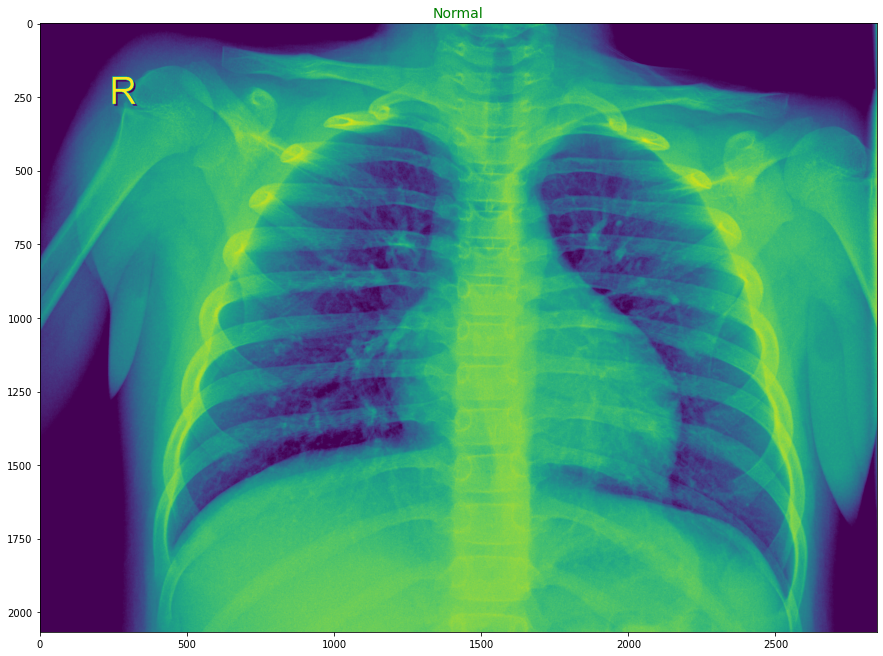

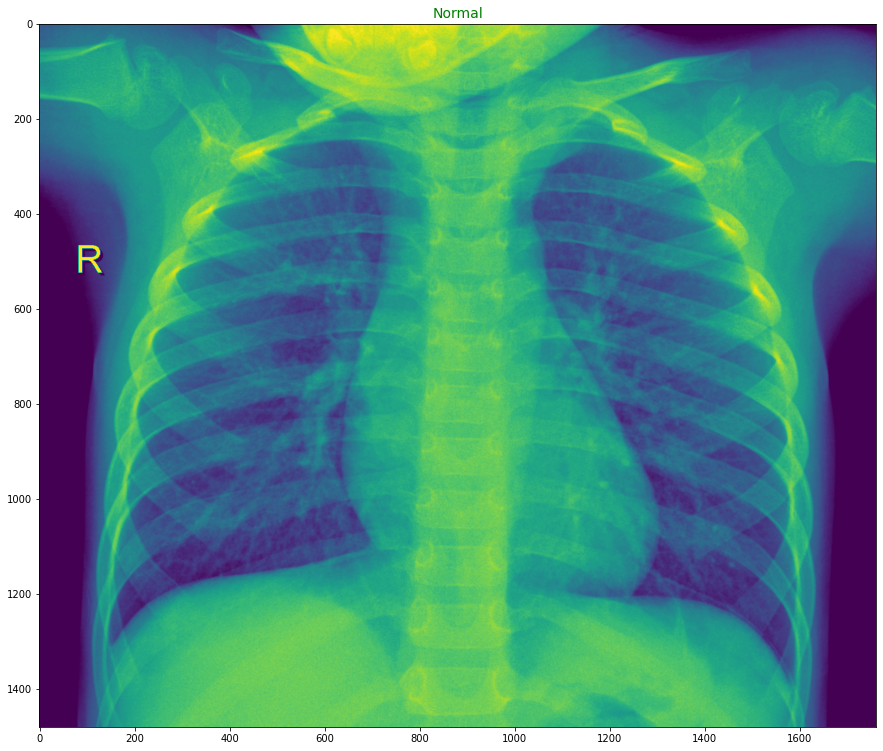

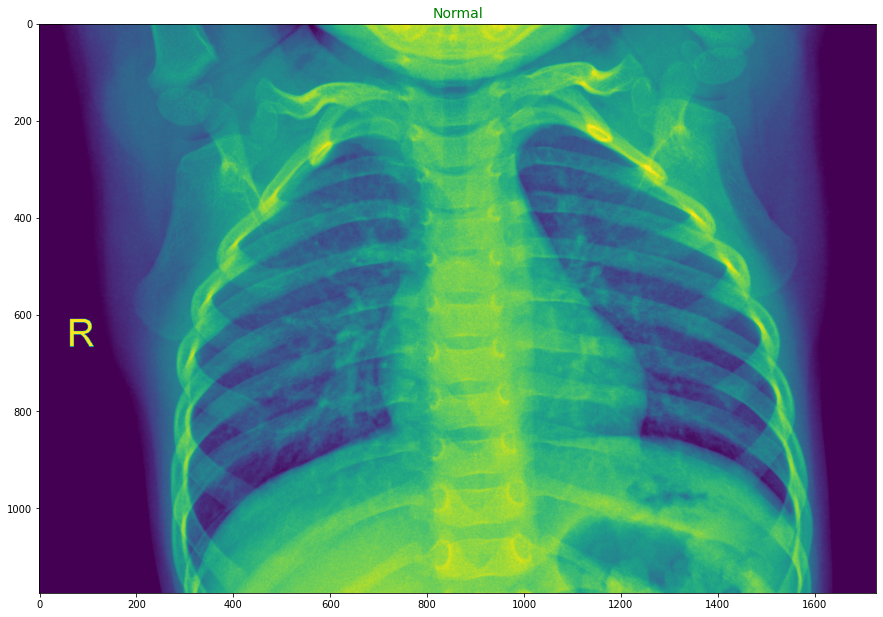

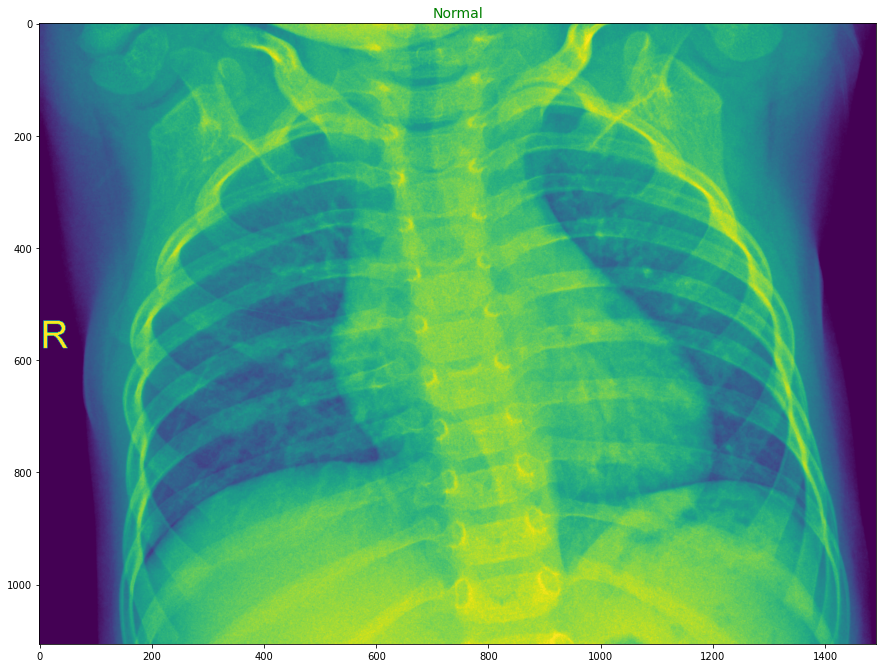

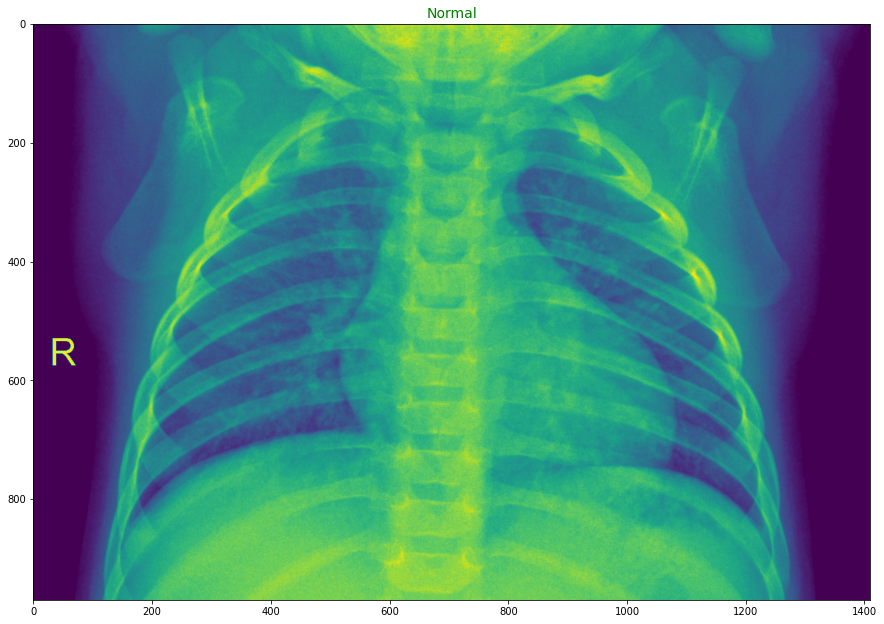

In [ ]:
for i in normal[0:5]:
  im = plt.imread(i)
  plt.figure(figsize=(15,20))
  plt.title('Normal',color='green',size=14)
  plt.imshow(im)
  plt.show()

In [ ]:
pnemonia = [img for img in glob('/content/drive/MyDrive/Image_data/Dataset/chest_xray/train/PNEUMONIA/*')]


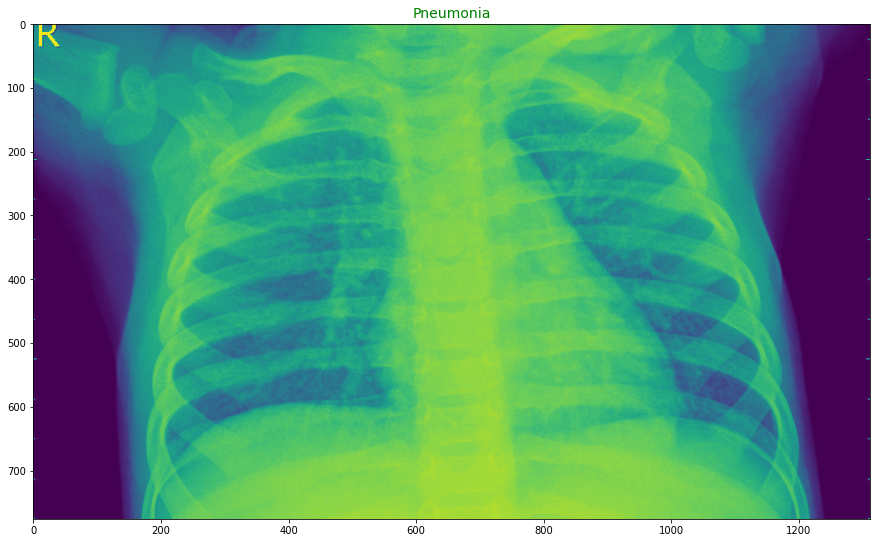

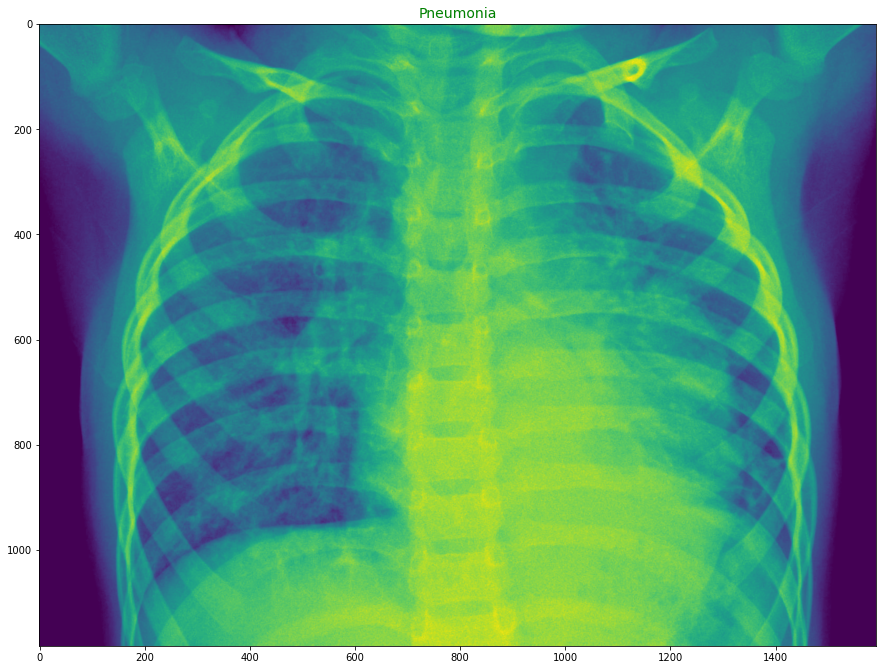

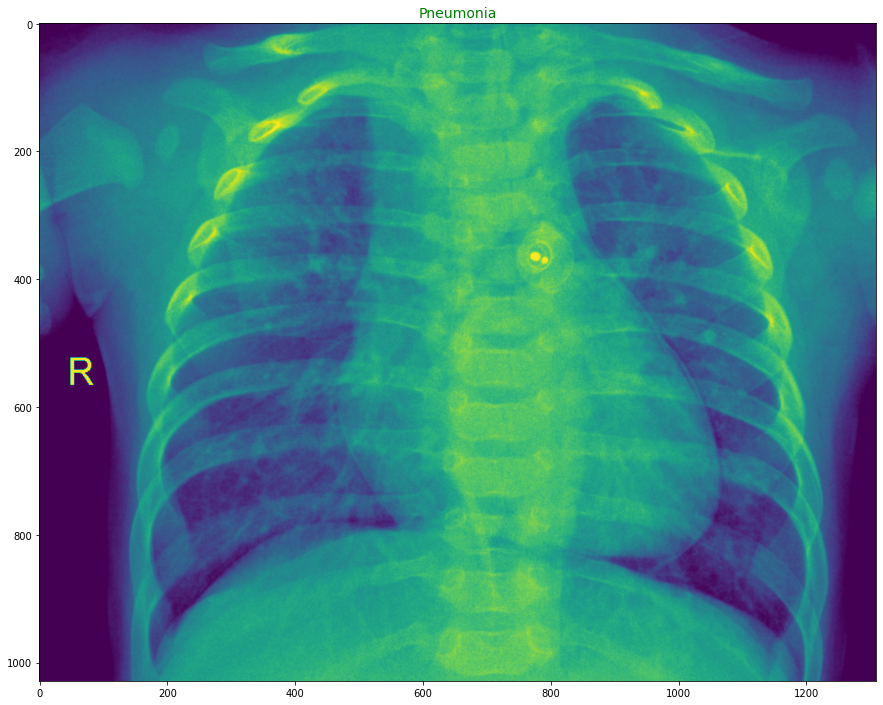

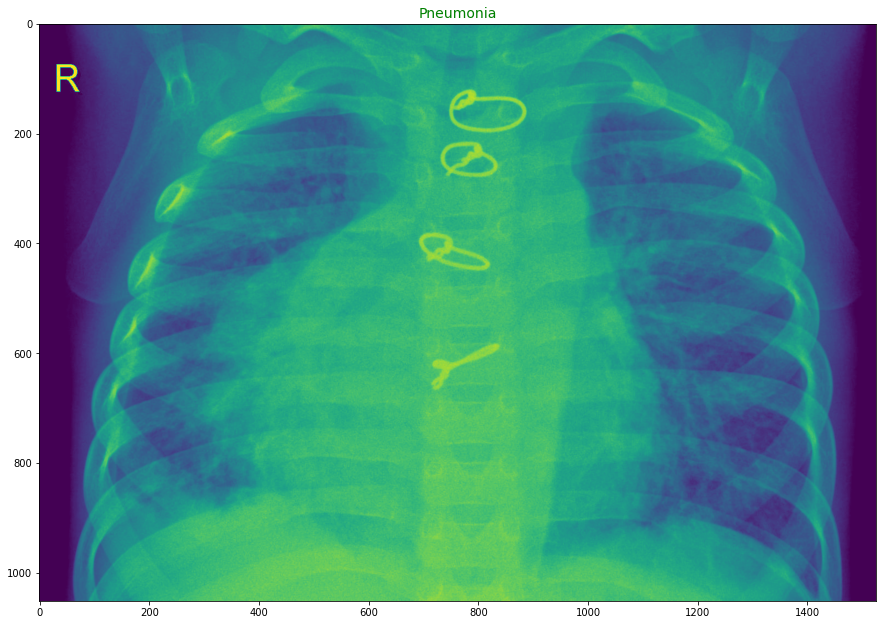

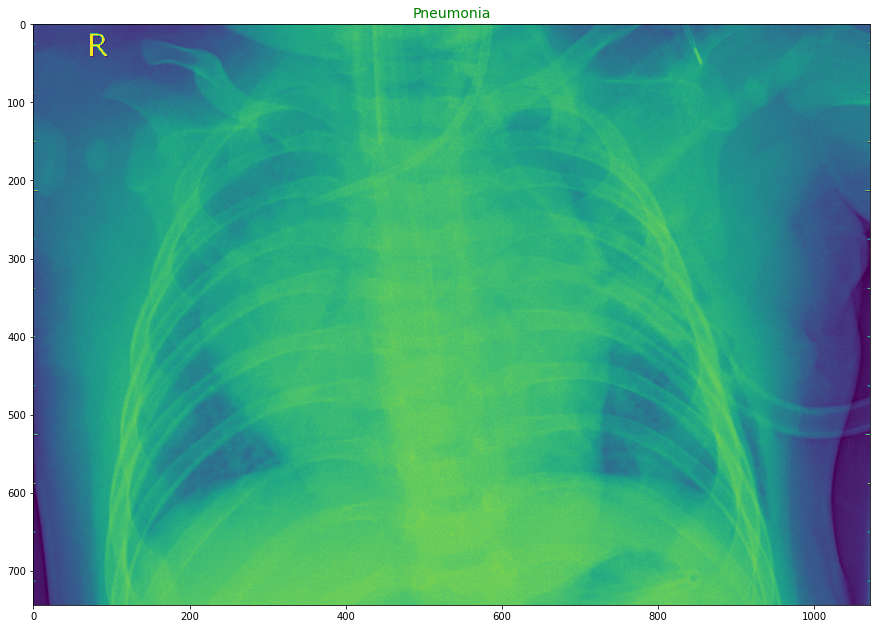

In [ ]:
for i in pnemonia[0:5]:
  im = plt.imread(i)
  plt.figure(figsize=(15,20))
  plt.title('Pneumonia',color='green',size=14)
  plt.imshow(im)
  plt.show()

In [ ]:

vgg16 = VGG16(input_shape=Image_size+[3], weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg16.output)
x = Flatten()(x)
x = Dense(2024,activation='relu')(x)

In [ ]:
prediction = Dense(2,activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg16.input, outputs = prediction)


In [ ]:
model.summary(
    
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam



In [ ]:
adam = Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=adam,loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1/255.0)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Image_data/Dataset/chest_xray/train',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Image_data/Dataset/chest_xray/test',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 624 images belonging to 2 classes.


In [ ]:


hist = model.fit_generator(train_set,steps_per_epoch=len(train_set),epochs=5,verbose=1
                           , validation_data=test_set,validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
163/163 [==============================] - 974s 6s/step - loss: 0.6628 - accuracy: 0.9072 - val_loss: 0.2955 - val_accuracy: 0.9054
Epoch 2/5
163/163 [==============================] - 149s 911ms/step - loss: 0.1180 - accuracy: 0.9548 - val_loss: 0.4682 - val_accuracy: 0.8542
Epoch 3/5
163/163 [==============================] - 148s 908ms/step - loss: 0.1025 - accuracy: 0.9626 - val_loss: 0.2848 - val_accuracy: 0.9183
Epoch 4/5
163/163 [==============================] - 148s 906ms/step - loss: 0.0910 - accuracy: 0.9643 - val_loss: 0.2590 - val_accuracy: 0.9135
Epoch 5/5
163/163 [==============================] - 148s 908ms/step - loss: 0.0790 - accuracy: 0.9695 - val_loss: 0.2716 - val_accuracy: 0.9231


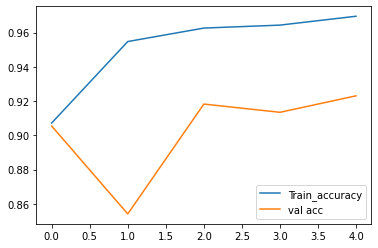

In [ ]:
plt.plot(hist.history['accuracy']  ,label = 'Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show
plt.savefig('Training score acc')

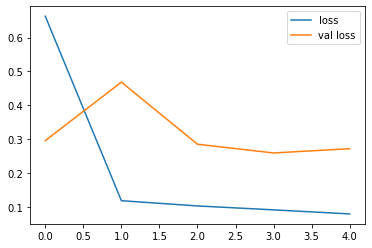

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'] ,label='val loss')
plt.legend()
plt.show
plt.savefig('Training loss val')


In [ ]:
from keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/Image_data/Dataset/Model_Vgg16.h5')

Validatation 

In [ ]:
model = load_model('/content/drive/MyDrive/Image_data/Dataset/Model_Vgg16.h5')

In [ ]:
img = image.load_img('/content/drive/MyDrive/Image_data/Dataset/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg',target_size=(224,224))

In [ ]:
x = image.img_to_array(img)

In [ ]:
x = np.expand_dims(x, axis=0)
from keras.applications.vgg16 import preprocess_input

In [ ]:
imag = preprocess_input(x)

In [ ]:
classes = model.predict(imag)

In [ ]:
print(classes)

[[3.8135504e-14 1.0000000e+00]]


In [ ]:
img = image.load_img('/content/drive/MyDrive/Image_data/Dataset/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
imag = preprocess_input(x)
classes = model.predict(imag)
c =  np.argmax(classes)
print(c)

1


In [ ]:
img = image.load_img('/content/drive/MyDrive/Image_data/Dataset/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
imag = preprocess_input(x)
classes = model.predict(imag)
c =  np.argmax(classes)
print(c)

1


In [ ]:
os.path.join('/content/drive/MyDrive/Feluda','/content/Model_Vgg16.h5')

'/content/Model_Vgg16.h5'

In [ ]:
os.path.join('/content/drive/MyDrive/Feluda','/content/Training loss val.png')
os.path.join('/content/drive/MyDrive/Feluda','/content/Training score acc.png')

'/content/Training score acc.png'

In [ ]:
!zip -r model.zip {'/content/Model_Vgg16.h5'}

updating: content/Model_Vgg16.h5 (deflated 45%)


In [ ]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

In [ ]:
print( os.getcwd() )

/content


In [ ]:
os.path.join('./result')

'./result'

In [ ]:
!pip show tensorflow



Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: absl-py, grpcio, astunparse, keras-preprocessing, h5py, typing-extensions, tensorboard, google-pasta, numpy, termcolor, wrapt, gast, flatbuffers, protobuf, six, wheel, opt-einsum, tensorflow-estimator
Required-by: fancyimpute
